# INF412 Assignment 2 Part 2
Luca Carnegie

Q7) Develop descriptive statistics using the dataset “Reddit.csv” on Quercus. This dataset reflects some attributes of the conversation as well as the users in Reddit forum. 

1)	Create histograms for variables “Expertise” and “Days_in_reddit.” Please briefly discuss the shape being normally distributed or not. If it is skewed, describe the direction being left or right skewed.

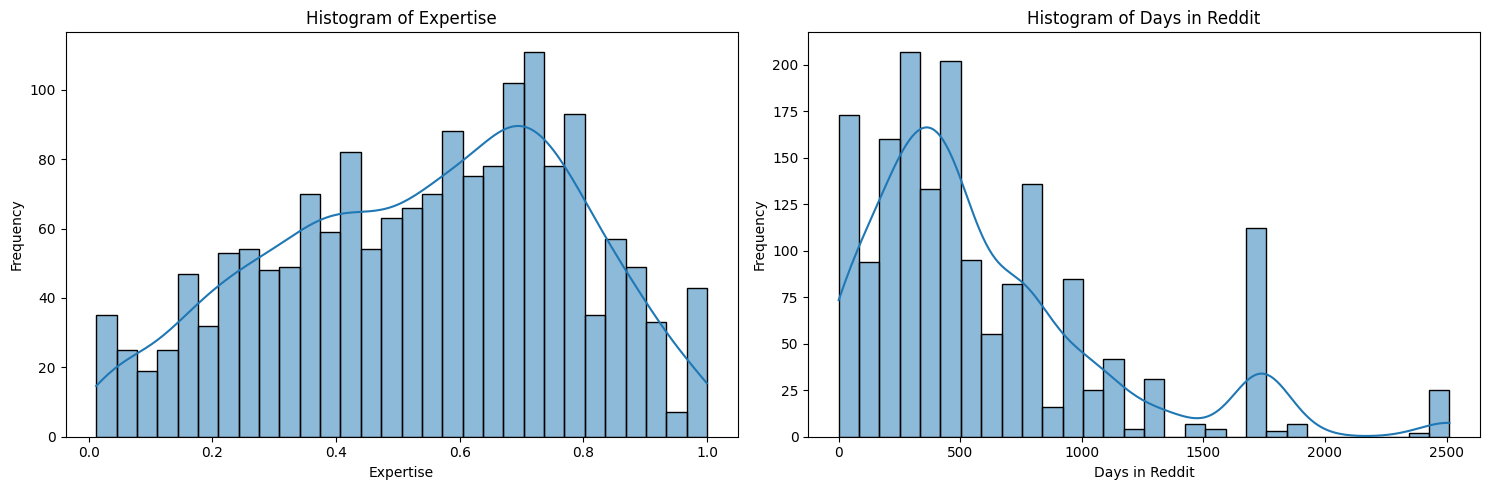

In [14]:
# Create histograms for "Expertise" and "Days_in_reddit"
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(reddit['Expertise'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Expertise')
axes[0].set_xlabel('Expertise')
axes[0].set_ylabel('Frequency')

sns.histplot(reddit['Days_in_reddit'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Days in Reddit')
axes[1].set_xlabel('Days in Reddit')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Histogram of Expertise is slightly right-skewed while the histgram for Days in reddit is slightly left skewed.

2. Create boxplot for variable “WordCount.” And obtain the summary for Q1, Q3, max, min, median, and IQR.

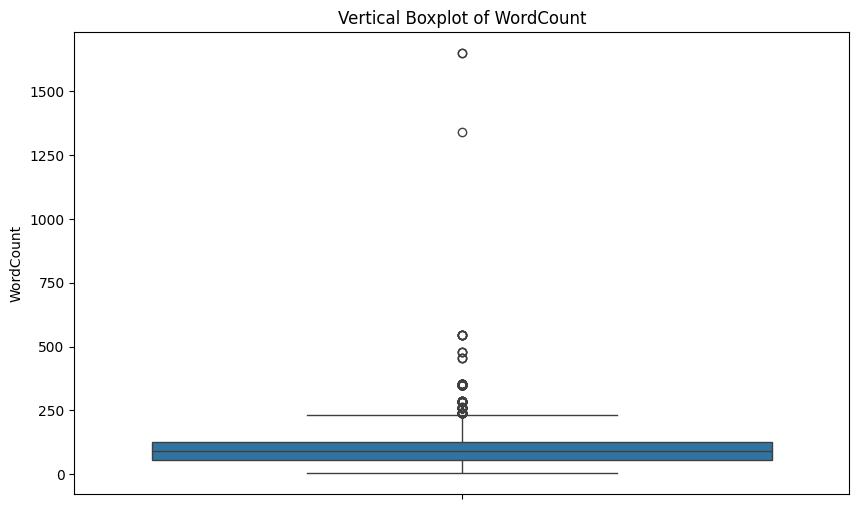

,Value
Statistic,
Q1,57.0
Q3,127.0
Max,1650.0
Min,4.0
Median,91.0
IQR,70.0


In [15]:
# Create vertical boxplot for variable 'WordCount'
plt.figure(figsize=(10, 6))
sns.boxplot(y=reddit['WordCount'])
plt.title('Vertical Boxplot of WordCount')
plt.ylabel('WordCount')
plt.show()

# Present the summary statistics attractively
summary_stats = {
    'Q1': Q1,
    'Q3': Q3,
    'Max': max_value,
    'Min': min_value,
    'Median': median_value,
    'IQR': IQR
}

summary_df = pd.DataFrame(summary_stats, index=[0])
summary_df = summary_df.T
summary_df.columns = ['Value']
summary_df.index.name = 'Statistic'
summary_df

3) Please develop a table to show the mean, standard deviation and correlations between each variable in the “Reddit.csv” file.

In [ ]:
# Calculate mean, standard deviation, and correlation matrix
mean_values = reddit.mean()
std_values = reddit.std()
correlation_matrix = reddit.corr()

# Create a summary table
summary_table = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_values
})

# Display the summary table
print("Summary Table:")
print(summary_table)

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

In [17]:
margins[0:5].mean()

NameError: name 'margins' is not defined

If we were to convert `margins` to a different variable type, say, a list, then we could no longer use `.mean()`:

In [ ]:
margins.mean()

35.30113636363637

In this case, we would have to take the longer route, by either converting our list `a` to a variable type with a `mean` method, such as a `pandas` series, or by importing `statistics.mean` and using that directly on the list:

In [ ]:
import statistics
statistics.mean(margins)


35.30113636363637

Here's what we would do to calculate the mean for only the first five observations:

In [ ]:
statistics.mean(margins[0:5])

36.6

(median)=


### The median


In [ ]:

sorted_margins = afl_margins.sort_values(by = 'afl.margins')
sorted_margins[84:92]


,afl.margins
165,29
173,29
150,29
117,30
1,31
4,32
123,32
136,33


If we peek at the middle of these sorted values, we can see that the middle values are 30 and 31, so the median winning margin for 2010 was 30.5 points. In real life, of course, no-one actually calculates the median by sorting the data and then looking for the middle value. In real life, we use the `median` command[^nomoremethodsnotes]:

[^nomoremethodsnotes]: By now, you are hopefully getting used to the "dot" syntax, where we use a `.` to call an object [method](methods). These distinctions don't really matter so much at this point anyway, so I'm just going to go ahead and start calling things "commands". However, for the sake of thoroughness (or something) I will point out that if your data are not in an object like a `pandas` series that has a built-in `median` method, you can also do `import statistics` and then write `statistics.median(margins)` and get the same result.

In [ ]:
margins.median()

30.5

In [ ]:

dataset = [-15,2,3,4,5,6,7,8,9,12]


Next, let's calculate means and medians. Since our data is now in a regular old list, and not in a dataframe, we can't use the `.mean()` and `.median()` [methods](methods), so we'll just go the old-school route, and `import` our old friend `statistics`:

In [ ]:
import statistics
statistics.mean(dataset)

4.1

In [ ]:
statistics.median(dataset)


5.5

(mode)=  
### Mode
The mode of a sample is very simple: it is the value that occurs most frequently. 

In [ ]:

afl_finalists.head(n=25)


[^onelineortwo]: `value_counts()` is a method available to us because our data is in a `pandas` dataframe. In the example below, I have made a new variable called `finalists` which contains the `afl.finalists` column from the `afl_finalists` dataframe. Of course, we could just do `value_counts()` directly on the `pandas` column like this: `afl_finalists['afl.finalists'].value_counts()`. The result is the same.

In [ ]:
finalists = afl_finalists['afl.finalists']
finalists.value_counts()


Now that we have our frequency table, we can just look at it and see that, over the 24 years for which we have data, Geelong has played in more finals than any other team. Thus, the mode of the `finalists` data is `"Geelong"`. If we want to extract the mode without inspecting the table, we can use the `statistics.mode` function to tell us which team has most often played in the finals.

In [ ]:

statistics.mode(finalists)


If we want to find the number of finals they have played in, we can e.g. first extract the frequencies with `value_counts` and then find the largest value with `max`.

In [ ]:
freq = finalists.value_counts()
freq.max()

Taken together, we observe that Geelong (39 finals) played in more finals than any other team during the 1987-2010 period. 

One last point to make with respect to the mode. While it's generally true that the mode is most often calculated when you have nominal scale data (because means and medians are useless for those sorts of variables), there are some situations in which you really do want to know the mode of an ordinal, interval or ratio scale variable. For instance, let's go back to thinking about our `afl_margins` variable. This variable is clearly ratio scale (if it's not clear to you, it may help to re-read [](scales)), and so in most situations the mean or the median is the measure of central tendency that you want. But consider this scenario... a friend of yours is offering a bet. They pick a football game at random, and (without knowing who is playing) you have to guess the *exact* margin. If you guess correctly, you win \$50. If you don't, you lose \$1. There are no consolation prizes for "almost" getting the right answer. You have to guess exactly the right margin. [^note7] For this bet, the mean and the median are completely useless to you. It is the mode that you should bet on. So, we calculate this modal value

[^note7]: This is called a "0-1 loss function", meaning that you either win (1) or you lose (0), with no middle ground.

In [ ]:
statistics.mode(margins)

In [ ]:
freq = margins.value_counts()
freq.max()

So the 2010 data suggest you should bet on a 3 point margin, and since this was observed in 8 of the 176 game (4.5% of games) the odds are firmly in your favour. 


## Measures of variability



### Range
We can calculate these values in Python using the `max()` and `min()` functions:

`margins.max()`  
`margins.min()`





### Interquartile range

The **_interquartile range_** (IQR) is like the range, but instead of calculating the difference between the biggest and smallest value, it calculates the difference between the 25th quantile and the 75th quantile.

In [ ]:

import numpy as np
np.quantile(margins, 0.5)

np.float64(30.5)

And not surprisingly, this agrees with the answer that we saw earlier with the `median()` function. Now, we can actually input lots of quantiles at once, by specifying which quantiles we want. So lets do that, and get the 25th and 75th percentile:

In [ ]:

np.quantile(margins, [.25, .75])


array([12.75, 50.5 ])

And, by noting that $50.5 - 12.75 = 37.75$, we can see that the interquartile range for the 2010 AFL winning margins data is 37.75. Of course, that seems like too much work to do all that typing, and luckily we don't have to, since the kind folks at `scipy` have already done the work for us and provided us with the  `stats.iqr` function, which will give us what we want.

In [ ]:

from scipy import stats
stats.iqr(margins)


np.float64(37.75)

(var)=
### Variance 



In [ ]:
import statistics
m = statistics.mean(afl_margins['afl.margins'])  #Find the mean of afl.margins
v = []                                           #Create an empty list
for n in afl_margins['afl.margins']:             #Look at each entry in afl.margins
    squared_error = (n-m)**2                     #Find the squared difference between each item and the mean
    v.append(squared_error)                      #Put each squared in the list v
var = statistics.mean(v)                         #Find the mean of v (mean of the squared errors)
var

675.9718168904958

Now let's use the `statistics.variance()` function:

In [ ]:
import statistics

var = statistics.variance(afl_margins['afl.margins'])

var

679.834512987013

Hm. These two numbers are very similar this time. That seems like too much of a coincidence to be a mistake. And of course it isn't a mistake. In fact, it's very simple to explain what Python is doing here, but slightly trickier to explain *why* Python is doing it. So let's start with the "what". What Python is doing is evaluating a slightly different formula to the one I showed you above. Instead of averaging the squared deviations, which requires you to divide by the number of data points $N$, Python has chosen to divide by $N-1$. In other words, the formula that Python is using is this one 

$$

\frac{1}{N-1} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2

$$

So that's the *what*. The real question is *why* Python is dividing by $N-1$ and not by $N$. After all, the variance is supposed to be the *mean* squared deviation, right? So shouldn't we be dividing by $N$, the actual number of observations in the sample? Well, yes, we should. However, as we'll discuss in the section on [estimation](estimation), there's a subtle distinction between "describing a sample" and "making guesses about the population from which the sample came". Up to this point, it's been a distinction without a difference. Regardless of whether you're describing a sample or drawing inferences about the population, the mean is calculated exactly the same way. Not so for the variance, or the standard deviation, or for many other measures besides. What I outlined to you initially (i.e., take the actual average, and thus dividing by $N$) assumes that you literally intend to calculate the variance of the sample. Most of the time, however, you're not terribly interested in the sample *in and of itself*. Rather, the sample exists to tell you something about the world. If so, you're actually starting to move away from calculating a "sample statistic", and towards the idea of estimating a "population parameter". However, I'm getting ahead of myself. For now, let's just take it on faith that Python knows what it's doing, and we'll revisit the question later on when we talk about [estimation](estimation). 

By the way, if you _do_ want to calculate variance and divide by $N$ and not $N-1$, Python does a have a way to do this as well; you just need to ask for `pvariance()` instead of `variance()`:

In [ ]:
population_variance = statistics.pvariance(afl_margins['afl.margins'])
sample_variance = statistics.variance(afl_margins['afl.margins'])

print("statistics.pvariance divides by N: ", population_variance)
print("statistics.variance divide by N-1: ", sample_variance)

(sd)=
### Standard deviation



$$
s = \sqrt{ \frac{1}{N} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2 }
$$


$$
\hat\sigma = \sqrt{ \frac{1}{N-1} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2 }
$$



In [ ]:
statistics.stdev(margins)

I should point out, though, that if you want to use this "corrected" MAD value as a robust version of the standard deviation, you really are relying on the assumption that the data are (or at least, are "supposed to be" in some sense) symmetric and basically shaped like a bell curve. That's really *not* true for our `afl_margins` data, so in this case I wouldn't try to use the MAD value this way.


### Which measure to use?

We've discussed quite a few measures of spread (range, IQR, MAD, variance and standard deviation), and hinted at their strengths and weaknesses. Here's a quick summary:


- [*Range*](range). Gives you the full spread of the data. It's very vulnerable to outliers, and as a consequence it isn't often used unless you have good reasons to care about the extremes in the data.
- [*Interquartile range*](iqr). Tells you where the "middle half" of the data sits. It's pretty robust, and complements the median nicely. This is used a lot.
- [*Mean absolute deviation*](aad). Tells you how far “on average” the observations are from the mean. It’s very interpretable, but has a few minor issues (not discussed here) that make it less attractive to statisticians than the standard deviation. Used sometimes, but not often.
- [*Variance*](var). Tells you the average squared deviation from the mean. It's mathematically elegant, and is probably the "right" way to describe variation around the mean, but it's completely uninterpretable because it doesn't use the same units as the data. Almost never used except as a mathematical tool; but it's buried "under the hood" of a very large number of statistical tools.
- [*Standard deviation*](sd). This is the square root of the variance. It's fairly elegant mathematically, and it's expressed in the same units as the data so it can be interpreted pretty well. In situations where the mean is the measure of central tendency, this is the default. This is by far the most popular measure of variation. 
- [*Median absolute deviation*](mad). The typical (i.e., median) deviation from the median value. In the raw form it's simple and interpretable; in the corrected form it's a robust way to estimate the standard deviation, for some kinds of data sets. Not used very often, but it does get reported sometimes.


In short, the IQR and the standard deviation are easily the two most common measures used to report the variability of the data; but there are situations in which the others are used. I've described all of them in this book because there's a fair chance you'll run into most of these somewhere.

(skew-and-kurtosis)=
## Skew and kurtosis

There are two more descriptive statistics that you will sometimes see reported in the psychological literature, known as skew and kurtosis. In practice, neither one is used anywhere near as frequently as the measures of central tendency and variability that we've been talking about. Skew is pretty important, so you do see it mentioned a fair bit; but I've actually never seen kurtosis reported in a scientific article to date. 

/Users/taowang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/taowang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/taowang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


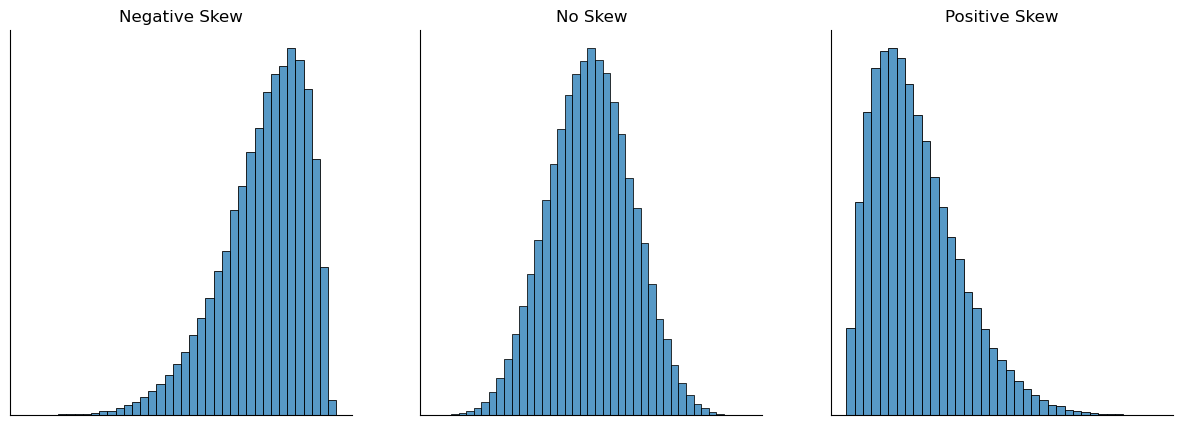

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# load some data
url = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/skewdata.csv'


df_skew = pd.read_csv(url)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.histplot(data = df_skew.loc[df_skew['Skew'] == 'NegSkew'], x = 'Values', binwidth = 0.02, ax=axes[0])
ax2 = sns.histplot(data = df_skew.loc[df_skew['Skew'] == 'NoSkew'], x = 'Values', binwidth = 0.02, ax=axes[1])
ax3 = sns.histplot(data = df_skew.loc[df_skew['Skew'] == 'PosSkew'], x = 'Values', binwidth = 0.02, ax=axes[2])

axes[0].set_title("Negative Skew")
axes[1].set_title("No Skew")
axes[2].set_title("Positive Skew")

for ax in axes:
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)

sns.despine()
    

```{glue:figure} skew_fig
:figwidth: 600px
:name: fig-skew

An illustration of skewness. On the left we have a negatively skewed data set (skewness = -.93), in the middle we have a data set with no skew (technically, skewness = .006), and on the right we have a positively skewed data set (skewness = .93).
```

## Getting an overall summary of a variable



### "Describing" a variable

The `describe()` method is an easy thing to use, but a tricky thing to understand in full, since it's a generic function. The basic idea behind the `describe()` method is that it prints out some useful information about whatever object we want to understand.

In [ ]:
afl_margins.describe()

For numeric variables, we get a whole bunch of useful descriptive statistics. It gives us the minimum and maximum values (i.e., the range), the first and third quartiles (25th and 75th percentiles; i.e., the IQR), the mean and the median. In other words, it gives us a pretty good collection of descriptive statistics related to the central tendency and the spread of the data.

Okay, what about if we feed it a logical vector instead? Let's say I want to know something about how many "blowouts" there were in the 2010 AFL season. I operationalise the concept of a blowout as a game in which the winning margin exceeds 50 points. Let's create a logical variable `blowouts` in which the $i$-th element is `TRUE` if that game was a blowout according to my definition:

In [ ]:
afl_margins['blowouts'] = np.where(afl_margins['afl.margins'] > 50, True, False)
afl_margins.head()

,afl.margins,blowouts
0,56,True
1,31,False
2,56,True
3,8,False
4,32,False


So that's what the `blowouts` variable looks like. Now let's ask Python to `describe()` this data: 

In [ ]:
afl_margins['blowouts'].describe()

count       176
unique        2
top       False
freq        132
Name: blowouts, dtype: object

In this context, `describe` gives us the total number of games (176), the number of categories for those games (2, either blowout or not a blowout), the most common category (False, that is, not a blowout), and a count for the more common category. 



### "Describing" a data frame

Okay what about data frames? When you `describe()` a dataframe, it produces a slightly condensed summary of each variable inside the data frame (as long as you specify that you want `'all'` the variables). 

In [ ]:
import pandas as pd
file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/clinical_trial_data.csv'

df_clintrial = pd.read_csv(file)
df_clintrial.head()



,drug,therapy,mood_gain
0,placebo,no.therapy,0.5
1,placebo,no.therapy,0.3
2,placebo,no.therapy,0.1
3,anxifree,no.therapy,0.6
4,anxifree,no.therapy,0.4


Our dataframe `df_clintrial` contains three variables, `drug`, `therapy` and `mood_gain`. Presumably then, this data is from a clinical trial of some kind, in which people were administered different drugs, and the researchers looked to see what the drugs did to their mood. Let's see if the `describe()` function sheds a little more light on this situation:

In [ ]:
df_clintrial.describe(include = 'all')

,drug,therapy,mood_gain
count,18,18,18.000000
unique,3,2,NaN
top,placebo,no.therapy,NaN
freq,6,9,NaN
mean,NaN,NaN,0.883333
std,NaN,NaN,0.533854
min,NaN,NaN,0.100000
25%,NaN,NaN,0.425000
50%,NaN,NaN,0.850000
75%,NaN,NaN,1.300000


If we want to `describe` the entire dataframe, we need to add the argument  `include = 'all'`. This gives us information on all of the of columns, but this is still rather limited. I mean, I guess I learned something about this data, but if we want to really understand these data, we will have to use other tools to investigate them. That is what the rest of this book is about.


(correlations)=
## Correlations

Up to this point we have focused entirely on how to construct descriptive statistics for a single variable. What we haven't done is talked about how to describe the relationships *between* variables in the data. To do that, we want to talk mostly about the **_correlation_** between variables. But first, we need some data.

### The data 

After spending so much time looking at the AFL data, I'm starting to get bored with sports. Instead, let's turn to a topic close to every parent's heart: sleep. The following data set is fictitious, but based on real events. Suppose I'm curious to find out how much my infant son's sleeping habits affect my mood. Let's say that I can rate my grumpiness very precisely, on a scale from 0 (not at all grumpy) to 100 (grumpy as a very, very grumpy old man). And, lets also assume that I've been measuring my grumpiness, my sleeping patterns and my son's sleeping patterns for quite some time now. Let's say, for 100 days. And, being a nerd, I've saved the data as a file called `parenthood.csv`. If we load the data...

In [ ]:
import pandas as pd

file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv'
parenthood = pd.read_csv(file)

parenthood.head()


,dan_sleep,baby_sleep,dan_grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


... we see that the file contains a single data frame called `parenthood`, which contains four variables `dan_sleep`, `baby_sleep`, `dan_grump` and `day`. Next, I'll calculate some basic descriptive statistics:

In [ ]:
parenthood.describe()

,dan_sleep,baby_sleep,dan_grump,day
count,100.000000,100.000000,100.00000,100.000000
mean,6.965200,8.049200,63.71000,50.500000
std,1.015884,2.074232,10.04967,29.011492
min,4.840000,3.250000,41.00000,1.000000
25%,6.292500,6.425000,57.00000,25.750000
50%,7.030000,7.950000,62.00000,50.500000
75%,7.740000,9.635000,71.00000,75.250000
max,9.000000,12.070000,91.00000,100.000000


Finally, to give a graphical depiction of what each of the three interesting variables looks like, {numref}`fig-grump` plots histograms. 



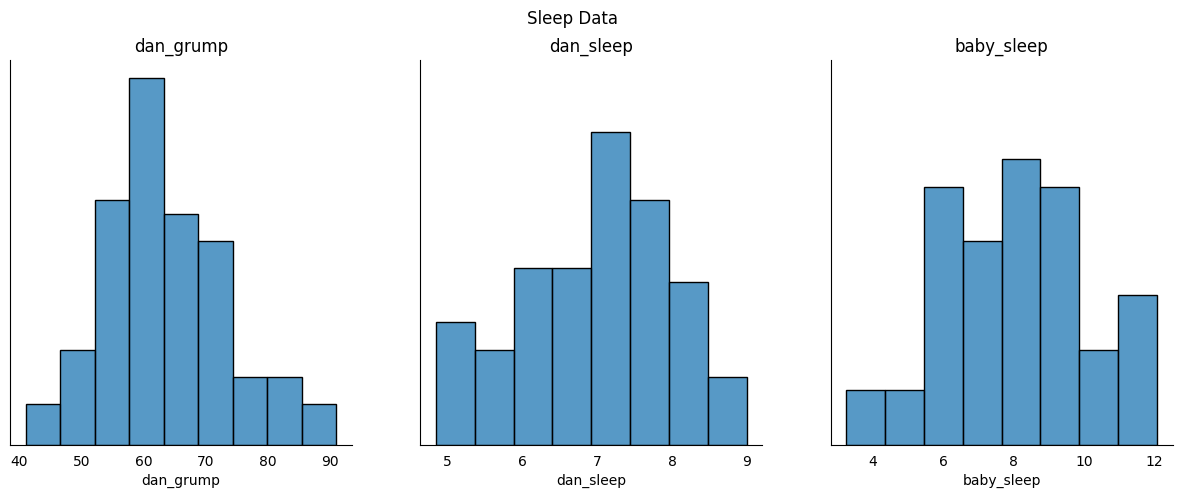

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

dan_grump = parenthood['dan_grump']
dan_sleep = parenthood['dan_sleep']
baby_sleep = parenthood['baby_sleep']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Sleep Data')

# My grumpiness
sns.histplot(dan_grump, ax=axes[0])
axes[0].set_title(dan_grump.name)

# My sleep
sns.histplot(dan_sleep, ax=axes[1])
axes[1].set_title(dan_sleep.name)

# Baby's sleep
sns.histplot(baby_sleep, ax=axes[2])
axes[2].set_title(baby_sleep.name);

for ax in axes:
    ax.set(yticklabels=[])
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)
    
sns.despine()


```{glue:figure} grump_fig
:figwidth: 650px
:name: fig-grump

Histograms for the three interesting variables in the parenthood data set.
```

One thing to note: just because Python can calculate dozens of different statistics doesn't mean you should report all of them. If I were writing this up for a report, I'd probably pick out those statistics that are of most interest to me (and to my readership), and then put them into a nice, simple table like the one in the table below. [^note12] Notice that when I put it into a table, I gave everything "human readable" names. This is always good practice. Notice also that I'm not getting enough sleep. This isn't good practice, but other parents tell me that it's standard practice.  

|variable                |min  |max   |mean  |median |std. dev |IQR  |
|:-----------------------|:----|:-----|:-----|:------|:--------|:----|
|Dan's grumpiness        |41   |91    |63.71 |62     |10.05    |14   |
|Dan's hours slept       |4.84 |9     |6.97  |7.03   |1.02     |1.45 |
|Dan's son's hours slept |3.25 |12.07 |8.05  |7.95   |2.07     |3.21 |

[^note12]: Actually, even that table is more than I'd bother with. In practice most people pick *one* measure of central tendency, and *one* measure of variability only.

(correlation)=

### The strength and direction of a relationship


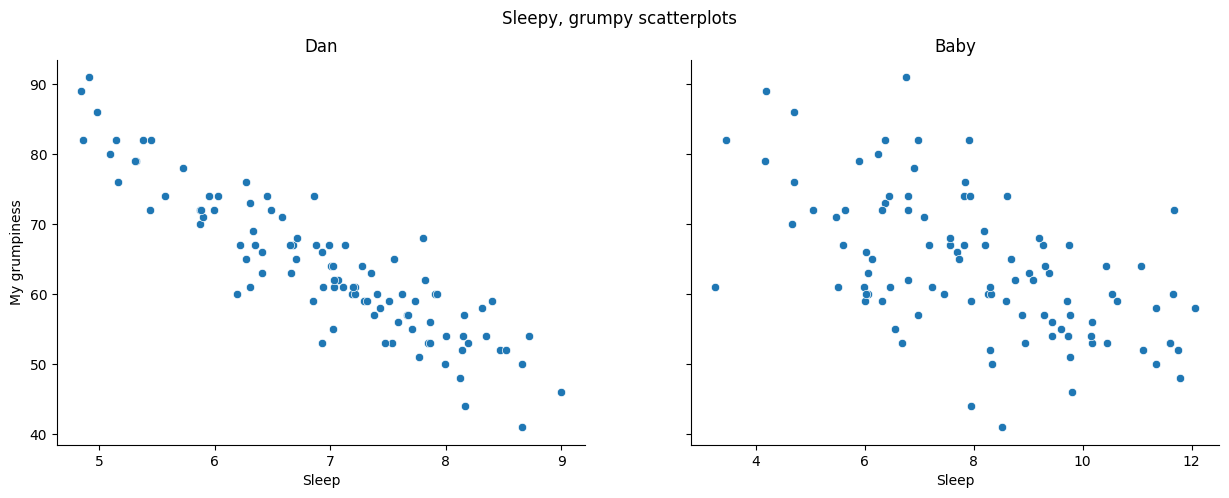

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Sleepy, grumpy scatterplots')

sns.scatterplot(x = dan_sleep, y = dan_grump, ax = axes[0])
fig.axes[0].set_title("Dan")
fig.axes[0].set_xlabel("Sleep")
fig.axes[0].set_ylabel("My grumpiness")

sns.scatterplot(x = baby_sleep, y = dan_grump, ax = axes[1])
fig.axes[1].set_title("Baby")
fig.axes[1].set_xlabel("Sleep")
fig.axes[1].set_ylabel("My grumpiness")

sns.despine()

```{glue:figure} sleep_scatter_fig1
:figwidth: 600px
:name: fig-sleep_scatter1

Scatterplots showing the relationship between dan.sleep and dan.grump (left) and the rela-
tionship between baby.sleep and dan.grump (right).
```

### The correlation coefficient

We can make these ideas a bit more explicit by introducing the idea of a **_correlation coefficient_** (or, more specifically, Pearson's correlation coefficient), which is traditionally denoted by $r$. The correlation coefficient between two variables $X$ and $Y$ (sometimes denoted $r_{XY}$), which we'll define more precisely in the next section, is a measure that varies from $-1$ to $1$. When $r = -1$ it means that we have a perfect negative relationship, and when $r = 1$ it means we have a perfect positive relationship. When $r = 0$, there's no relationship at all. If you look at {numref}`fig-corrs`, you can see several plots showing what different correlations look like.

### Calculating correlations in Python



Calculating correlations in Python can be done using the `corr()` method. The simplest way to use the command is to specify two input arguments `x` and `y`, each one corresponding to one of the variables. The following extract illustrates the basic usage of the function: [^note13] 

[^note13]: If you are reading this after having already completed the chapter on [hypothesis testing](hypothesis-testing) you might be wondering about hypothesis tests for correlations. This can be done with `pingouin.corr` (or `scipy.stats.pearsonr`, or `scipy.stats.spearmanr`).


In [ ]:
x = parenthood['dan_sleep']
y = parenthood['dan_grump']

In [ ]:
x.corr(y)

np.float64(-0.9033840374657267)

However, the `corr()` function is a bit more powerful than this simple example suggests. For example, you can also calculate a complete "correlation matrix", between all pairs of variables in the data frame:

In [ ]:
parenthood.corr()

,dan_sleep,baby_sleep,dan_grump,day
dan_sleep,1.000000,0.627949,-0.903384,-0.098408
baby_sleep,0.627949,1.000000,-0.565964,-0.010434
dan_grump,-0.903384,-0.565964,1.000000,0.076479
day,-0.098408,-0.010434,0.076479,1.000000


The lesson here, which so very many people seem to forget in real life is "*always graph your raw data*". This will be the focus of the chapter on [](DrawingGraphs).


The Pearson correlation coefficient is useful for a lot of things, but it does have shortcomings. One issue in particular stands out: what it actually measures is the strength of the *linear* relationship between two variables. In other words, what it gives you is a measure of the extent to which the data all tend to fall on a single, perfectly straight line. Often, this is a pretty good approximation to what we mean when we say "relationship", and so the Pearson correlation is a good thing to calculation. Sometimes, it isn't. 

One very common situation where the Pearson correlation isn't quite the right thing to use arises when an increase in one variable $X$ really is reflected in an increase in another variable $Y$, but the nature of the relationship isn't necessarily linear. An example of this might be the relationship between effort and reward when studying for an exam. If you put in zero effort ($X$) into learning a subject, then you should expect a grade of 0% ($Y$). However, a little bit of effort will cause a *massive* improvement: just turning up to lectures means that you learn a fair bit, and if you just turn up to classes, and scribble a few things down so your grade might rise to 35%, all without a lot of effort. However, you just don't get the same effect at the other end of the scale. As everyone knows, it takes *a lot* more effort to get a grade of 90% than it takes to get a grade of 55%. What this means is that, if I've got data looking at study effort and grades, there's a pretty good chance that Pearson correlations will be misleading. 


To illustrate, consider the data plotted in {numref}`fig-rankcorr`, showing the relationship between hours worked and grade received for 10 students taking some class. The curious thing about this -- highly fictitious -- data set is that increasing your effort *always* increases your grade. It might be by a lot or it might be by a little, but increasing effort will never decrease your grade. The data are stored in `effort.csv`:

In [ ]:
import pandas as pd

file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/effort.csv'

effort = pd.read_csv(file)

effort

,hours,grade
0,2,13
1,76,91
2,40,79
3,6,14
4,16,21
5,28,74
6,27,47
7,59,85
8,46,84
9,68,88


If we run a standard Pearson correlation, it shows a strong relationship between hours worked and grade received,

In [ ]:
effort['hours'].corr(effort['grade'])

np.float64(0.9094019658612527)

/var/folders/p2/sg76_lpn0r71mtxgmpkl5p580000gn/T/ipykernel_2783/1960754762.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hours', y='grade', data=effort, color = "black", ci=None, ax=ax)


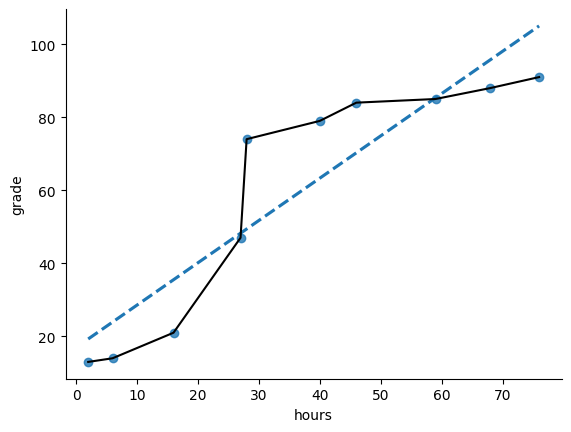

In [ ]:
import seaborn as sns

fig, ax = plt.subplots()
sns.regplot(x='hours', y='grade', data=effort, ci=None, ax=ax)
sns.lineplot(x='hours', y='grade', data=effort, color = "black", ci=None, ax=ax)
ax.lines[0].set_linestyle("--")

sns.despine()

#glue("rankcorr-fig", fig, display=False)

```{glue:figure} rankcorr-fig
:figwidth: 600px
:name: fig-rankcorr

The relationship between hours worked and grade received, for a toy data set consisting of only 10 students (each dot corresponds to one student). The dashed line through the middle shows the linear relationship between the two variables. This produces a strong Pearson correlation of $r = .91$. However, the interesting thing to note here is that there's actually a perfect monotonic relationship between the two variables: in this toy example at least, increasing the hours worked always increases the grade received, as illustrated by the solid line. This is reflected in a Spearman correlation of $rho = 1$. With such a small data set, however, it's an open question as to which version better describes the actual relationship involved.
```


but this doesn't actually capture the observation that increasing hours worked *always* increases the grade. There's a sense here in which we want to be able to say that the correlation is *perfect* but for a somewhat different notion of what a "relationship" is. What we're looking for is something that captures the fact that there is a perfect **_ordinal relationship_** here. That is, if student 1 works more hours than student 2, then we can guarantee that student 1 will get the better grade. That's not what a correlation of $r = .91$ says at all.

How should we address this? Actually, it's really easy: if we're looking for ordinal relationships, all we have to do is treat the data as if it were ordinal scale! So, instead of measuring effort in terms of "hours worked", lets rank all 10 of our students in order of hours worked. That is, student 1 did the least work out of anyone (2 hours) so they get the lowest rank (rank = 1). Student 4 was the next laziest, putting in only  6 hours of work in over the whole semester, so they get the next lowest rank (rank = 2). Notice that I'm using "rank = 1" to mean "low rank". Sometimes in everyday language we talk about "rank = 1" to mean "top rank" rather than "bottom rank". So be careful: you can rank "from smallest value to largest value" (i.e., small equals rank 1) or you can rank "from largest value to smallest value" (i.e., large equals rank 1). In this case, I'm ranking from smallest to largest, because that is how Python does it. But in real life, it's really easy to forget which way you set things up, so you have to put a bit of effort into remembering! 

Okay, so let's have a look at our students when we rank them from worst to best in terms of effort and reward: 


|            | rank (hours worked) | rank (grade received) |
| :--------: | :-----------------: | :-------------------: |
| student 1  |          1          |           1           |
| student 2  |         10          |          10           |
| student 3  |          6          |           6           |
| student 4  |          2          |           2           |
| student 5  |          3          |           3           |
| student 6  |          5          |           5           |
| student 7  |          4          |           4           |
| student 8  |          8          |           8           |
| student 9  |          7          |           7           |
| student 10 |          9          |           9           |


Hm. These are *identical*. The student who put in the most effort got the best grade, the student with the least effort got the worst grade, etc. We can get Python to construct new variables with these rankings using the `rank()` method, and specifiying which columns in our dataframe we want to rank, like this:

In [ ]:
ranked_hours = effort['hours'].rank()
ranked_grades = effort['grade'].rank()

As the table above shows, these two rankings are identical, so if we now correlate them we get a perfect relationship:

In [ ]:
ranked_hours.corr(ranked_grades)

What we've just re-invented is **_Spearman's rank order correlation_**, usually denoted $\rho$ to distinguish it from the Pearson correlation $r$. We can calculate Spearman's $\rho$ using R in two different ways. Firstly we could do it the way I just showed, using the `rank()` function to construct the rankings, and then calculate the Pearson correlation on these ranks. However, that's way too much effort to do every time. It's much easier to just specify the `method` argument of the `corr()` method. [^note14] Since we are skipping the extra step of "manually" creating new, ranked variables, we can just operate directly on the dataframe columns:

[^note14]: Yikes, that's two uses of the word method, and they mean different things. Sigh. Language is hard, and things get confusing when code-switching between human language and computer language!

In [ ]:
effort['hours'].corr(effort['grade'], method="spearman")

The default value of the `method` argument is `"pearson"`, which is why we didn't have to specify it earlier on when we were doing Pearson correlations, although we could have, for extra clarity. 

(missing)=
## Handling missing values

There's one last topic that I want to discuss briefly in this chapter, and that's the issue of **_missing data_**. Real data sets very frequently turn out to have missing values: perhaps someone forgot to fill in a particular survey question, for instance. Missing data can be the source of a lot of tricky issues, most of which I'm going to gloss over. However, at a minimum, you need to understand the basics of handling missing data in Python. 


### The single variable case

Let's start with the simplest case, in which you're trying to calculate descriptive statistics for a single variable which has missing data. In Python, this means that there will be `nan` ("not a number") values in your data vector. Let's create a variable like that:

In [ ]:
partial = [10, 20, float('nan'), 30]

Let's assume that you want to calculate the mean of this variable. By default, Python assumes that you want to calculate the mean using all four elements of this vector, which is probably the safest thing for a dumb automaton to do, but it's rarely what you actually want. Why not? Well, remember that although `nan` stands for "not a number", the more accurate interpretation of `nan` here is "There should be a number here, but I don't know what that number is". This means that `1 + nan = nan`: if I add 1 to some number that I don't know (i.e., the `nan`) then the answer is *also* a number that I don't know. As a consequence, if you don't explicitly tell Python to ignore the `nan` values, and the data set does have missing values, then the output will itself be a missing value. If I try to calculate the mean of the `partial` vector, without doing anything about the missing value, here's what happens:

In [ ]:
statistics.mean(partial)

Technically correct, but deeply unhelpful. There are a few ways to deal with this. The first is to use methods from `numpy`. `numpy` has a collection of methods to calculate nan-friendly versions of your favorite descriptive statistics (although correlation is a special case, more on that below), such as `nanmean`, `nanmedian`, `nanpercentile`, `nanmax`, `nanmin`, `nansum`, `nanstd`, etc. So:

In [ ]:
import numpy as np


print(np.nanmean(partial))

print(np.nanmedian(partial))

print(np.nanstd(partial))


This is great! Now we can get the descriptive statistics we want, without those pesky `nan`s getting in the way. Still, it is a little tedious to need to remember to to use the `np.nan` version of these functions when dealing with data containing `nan`s (which real data sets often do). As a bit of a consolation, `pandas` dataframes can already calculate these statistics for us, and ignore `nan`s by default. So, if we put our data in a `pandas` dataframe, we don't need to worry about it:

In [ ]:
import pandas as pd

df = pd.DataFrame(
    {'var1': partial,
     'var2': [10, float('nan'), float('nan'), 35],
     'var3': [float('nan'), 12, 18, 27]
    }) 

df

In [ ]:
print(df['var1'].mean())
print(df['var1'].median())
print(df['var1'].std())

This is also great, but there is one little niggling problem. `var1` in our dataframe is the same as the `partial` variable we defined earlier. The mean and median values look the same as when we used the `numpy` methods, but the standard deviation is little bit different. What's up with that? As it turns out, `numpy` and `pandas` calculate standard deviation in slightly different ways: `numpy` uses $N$ in the demoninator, while `pandas` uses the "unbiased estimator" $N-1$ in the demoniator. To make `numpy` behave like `pandas`, we need to pass the `ddof=1` argument to `nanmean()`, like so:

In [ ]:
print(df['var1'].std())
print(np.nanstd(partial, ddof=1))

and all is well! 

Notice that the mean is `20`  (i.e., `60 / 3`) and *not* `15`. When Python ignores an `nan` value, it genuinely ignores it. In effect, the calculation above is identical to what you'd get if you asked for the mean of the three-element vector `[10, 20, 30]`. This is also why the mean and the median are the same in this case.


### Missing values in pairwise calculations

I mentioned earlier that correlation is a special case. It doesn't have an `np.nancorr` argument, because the story becomes a lot more complicated when more than one variable is involved. To explore this, lets look at the data in `parenthood2.csv`. This is just like the `parenthood` data from before, but with some missing values introducd. Maybe I was just too tired some mornings to record the baby's hours of sleep, or to measure my own grumpiness. It happens.

In [ ]:
import pandas as pd

file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood2.csv'

parenthood2 = pd.read_csv(file)
parenthood2.head()

,dan_sleep,baby_sleep,dan_grump,day
0,7.59,NaN,56.0,1
1,7.91,11.66,60.0,2
2,5.14,7.92,82.0,3
3,7.71,9.61,55.0,4
4,6.68,9.75,NaN,5


We can see some of those pesky `nan`s right in the first 5 rows, and if we `describe()` our data, we can get a feeling for how many there are:

In [ ]:
parenthood2.describe()

By looking in the `count` row, we can see that out of the 100 days for which we have data, there are 9 days missing for `dan_sleep`, 11 days missing for `baby_sleep` and eight days missing for `dan_grump`. Suppose what I would like is a correlation matrix. And let's also suppose that I don't bother to tell Python how to handle those missing values. Here's what happens:

In [ ]:
parenthood2.corr()

,dan_sleep,baby_sleep,dan_grump,day
dan_sleep,1.000000,0.614723,-0.903442,-0.076797
baby_sleep,0.614723,1.000000,-0.567803,0.058309
dan_grump,-0.903442,-0.567803,1.000000,0.005833
day,-0.076797,0.058309,0.005833,1.000000


This actually looks pretty good! We *know* there are `nan`s in the data, but `pandas` seems to deal with them handily. This is not untrue, but there is a small but important detail to be aware of. When it encounters data with `nan`s, `pandas` only looks at the pair of variables that it's trying to correlate when determining what to drop. So, for instance, since the only missing value for observation 1 of `parenthood2` is for `baby_sleep`, Python will only drop observation 1 when `baby_sleep` is one of the variables involved, and keeps observation 1 when trying to correlate e.g. `dan.sleep` and `dan_grump`. If we want to simply ignore *all* rows that contain a `nan`, we need to tell `pandas` to drop them, like this:

In [ ]:
parenthood2.dropna().corr()

,dan_sleep,baby_sleep,dan_grump,day
dan_sleep,1.000000,0.639498,-0.899515,0.061329
baby_sleep,0.639498,1.000000,-0.586561,0.145558
dan_grump,-0.899515,-0.586561,1.000000,-0.068166
day,0.061329,0.145558,-0.068166,1.000000


By checking the length of `parenthood2` and `parenthood2.dropna()`, we can see that using `dropna()` removes 27 entire rows from our data:

In [ ]:
print(len(parenthood2))
print(len(parenthood2.dropna()))

100
73


The results from `parenthood2.corr()` and `parenthood2.dropna().corr()` are similar, but not quite the same. The two approaches have different strengths and weaknesses. The "pairwise" approach, the one in which Python only drops observations when they are involved in the comparison at hand, has the advantage that it keeps more observations, so you're making use of more of your data and (as we'll discuss in tedious detail in the chapter on [estimation](estimation)) this improves the reliability of your estimated correlation. On the other hand, it means that every correlation in your correlation matrix is being computed from a slightly different set of observations, which can be awkward when you want to compare the different correlations that you've got. 
 

## Create a Descriptive Table

We can use the "describe()" command. "T" is the shortcut for "transpose", which changes the row to column or vice versa.

In [ ]:
summary_descriptive_stats = parenthood2.describe().T[['mean', 'std']].round(1)

print(summary_descriptive_stats)

            mean   std
dan_sleep    7.0   1.0
baby_sleep   8.1   2.0
dan_grump   63.2   9.9
day         50.5  29.0


In [ ]:
correlation_matrix = parenthood2.corr().round(3)

print(correlation_matrix)

            dan_sleep  baby_sleep  dan_grump    day
dan_sleep       1.000       0.615     -0.903 -0.077
baby_sleep      0.615       1.000     -0.568  0.058
dan_grump      -0.903      -0.568      1.000  0.006
day            -0.077       0.058      0.006  1.000


In [ ]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

print(mask)

[[False  True  True  True]
 [False False  True  True]
 [False False False  True]
 [False False False False]]


`np.ones_like(correlation_matrix, dtype=bool)`: This creates a matrix of the same shape as correlation_matrix, filled with True values (since dtype=bool). Essentially, it's a boolean matrix where all elements are True.  

`np.triu(...)`: This function extracts the upper triangle of a matrix. The`k=1` parameter shifts the start of the upper triangle one position to the right of the diagonal. As a result, the diagonal elements (which represent the correlation of a variable with itself, always 1) are not included in the upper triangle, and the upper triangle contains only the elements above the diagonal.  

The result of this operation (mask) is a boolean matrix where elements that should be considered in the upper triangle are marked as False (since `k=1` skips the diagonal and includes elements above it), and the rest are True.

In [ ]:
upper_triangle_correlation = correlation_matrix.mask(mask)

print(upper_triangle_correlation)

            dan_sleep  baby_sleep  dan_grump  day
dan_sleep       1.000         NaN        NaN  NaN
baby_sleep      0.615       1.000        NaN  NaN
dan_grump      -0.903      -0.568      1.000  NaN
day            -0.077       0.058      0.006  1.0


`correlation_matrix.mask(mask)`: This applies the mask to the correlation_matrix. In this context, `.mask(...)` replaces the positions of the correlation_matrix that correspond to True in the mask with `NaN` (by default).

In [ ]:
# join the two tables
correlation_table = summary_descriptive_stats.join(upper_triangle_correlation)

# reset the index to be unified for future use
correlation_table.reset_index(inplace=True)

# rename the column names
correlation_table.rename(columns={'index': '', 'mean': 'Mean', 'std': 'SD'}, inplace=True)

# change the 'NaN' to white space
correlation_table = correlation_table.fillna('')

Show the tables

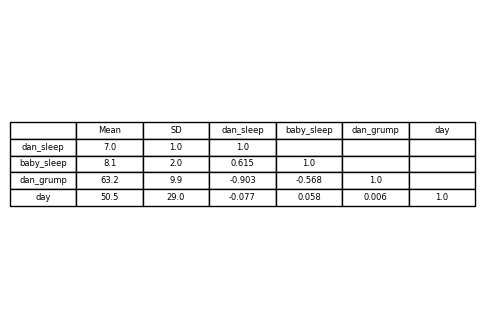

In [ ]:
ig, ax = plt.subplots(figsize=(6, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=correlation_table.values, colLabels=correlation_table.columns, loc='center',
cellLoc='center', colLoc='center')
plt.show()